In [8]:
library(polynom)
library(ggplot2)

In [31]:
f1 <- function(x) {
  return(exp(3 * x) * sin(7 * x))
}

df <- data.frame(cbind(c(0, 1, 1, 0), c(0, pi/2, 0, 0)))

In [32]:
curvedf <- data.frame(cbind(c(0, pi/8, pi/4), c(0, f(pi/8), f(pi/4))))
poly.calc(curvedf$X1, curvedf$X2)

-0.2071068*x + 0.9003163*x^2 

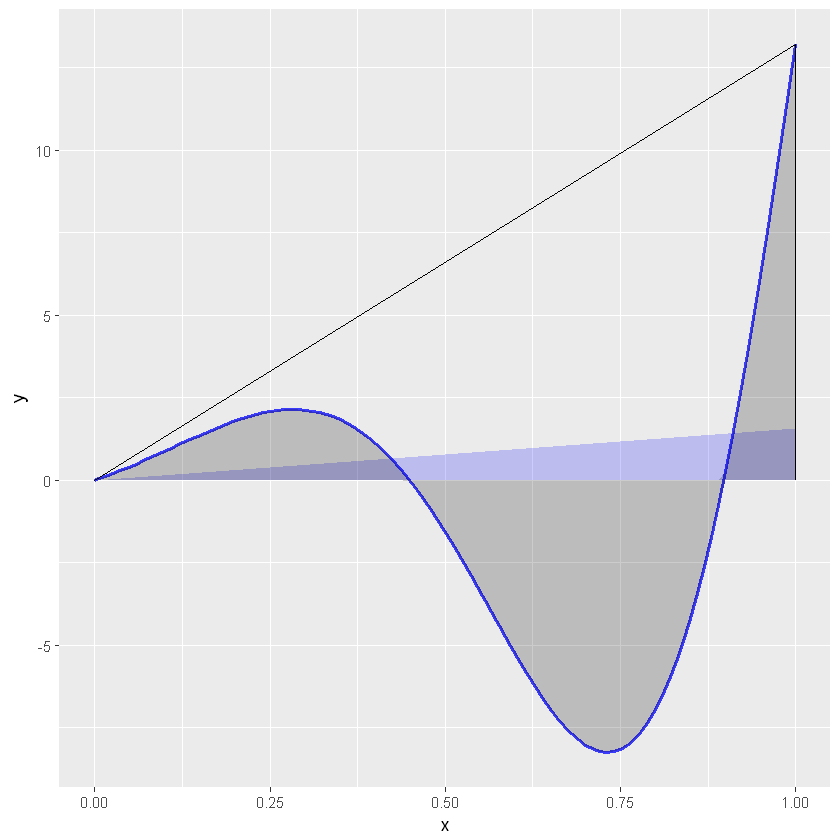

In [26]:
ggplot(data = data.frame(x = 0), mapping = aes(x = x)) + 
  stat_function(fun = f1, size = 1.05, alpha = 0.75, color='blue') + 
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = f1(1))) + 
  geom_segment(aes(x = 1, y = 0, xend = 1, yend = f1(1))) + 
  geom_polygon(data = df, aes(x=X1, y=X2), fill = 'blue', alpha = 0.2) + 
  geom_area(stat = 'function', fun = f1, fill = 'black', alpha = 0.2, xlim = c(0, 1)) + 
  xlim(c(0,1))

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


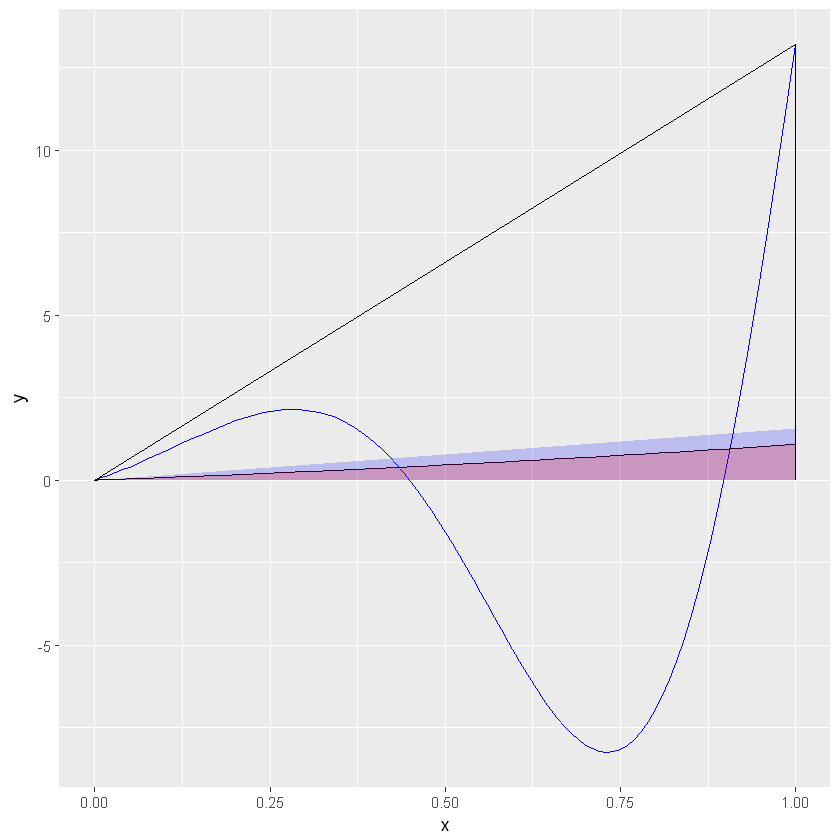

In [24]:
# Plot the function and the trapezoidal and Simpson's rule approximations.
f2 <- function(x) {
  return(0.76232259*x + 0.317332129*x^2 )
}
ggplot(data = data.frame(x = 0), mapping = aes(x = x)) + 
  stat_function(fun = f1, color = 'blue') + xlim(c(0,1)) + 
  stat_function(fun = f2) + xlim(c(0,1)) + 
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = f1(1))) + 
  geom_segment(aes(x = 1, y = 0, xend = 1, yend = f1(1))) + 
  geom_polygon(data = df, aes(x=X1, y=X2), fill = 'blue', alpha = 0.2) + 
  geom_area(stat = 'function', fun = f2, fill = 'red', alpha = 0.2, xlim = c(0, 1))

In [25]:
trapezoid <- function(f, a, b) {
  if (is.function(f) == FALSE) {
    stop('f must be a function with one parameter (variable)')
  }
   
  h <- b - a
   
  fxdx <- (h / 2) * (f(a) + f(b))
   
  return(fxdx)
}
trapezoid(f1, 0, 1)

simpsons.rule <- function(f, a, b) {
  if (is.function(f) == FALSE) {
    stop('f must be a function with one parameter (variable)')
  }
   
  h <- (b - a) / 2
  x0 <- a
  x1 <- a + h
  x2 <- b
   
  s <- (h / 3) * (f(x0) + 4 * f(x1) + f(x2))
   
  return(s)
}
simpsons.rule(f2, 0, 1)

[1] 6.597964

[1] 0.4869387